# Exploratory Data Analysis

Exploratory Data Analysis on general dataset of historical customer purchases up to September 21st, 2025.

`train_df`: labeled dataset for training and evaluation

`test_df`: unlabeled dataset for final evaluation 

### Load Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from pathlib import Path
from datetime import datetime

DATA_COLLECTED_AT = datetime(2025, 9, 21).date()
NOTEBOOK_DIR = Path.cwd()
DATA_DIR = NOTEBOOK_DIR / "../datasets/customer_purchases"

def read_csv(filename: str):
    file = DATA_DIR / f"{filename}.csv"
    df = pd.read_csv(file)
    return df

# training data
train_df = read_csv("customer_purchases_train")

# final test data (no labels)
test_df = read_csv("customer_purchases_test")

df = read_csv("processed_train")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 74 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          7289 non-null   object 
 1   customer_gender_female               7289 non-null   float64
 2   customer_gender_male                 7289 non-null   float64
 3   customer_age                         7289 non-null   float64
 4   customer_seniority                   7289 non-null   float64
 5   customer_avg_days_between_purchases  7289 non-null   float64
 6   customer_days_since_last_purchase    7289 non-null   float64
 7   customer_avg_purchase_cost           7289 non-null   float64
 8   customer_std_purchase_cost           7289 non-null   float64
 9   customer_cat_pct_blouse              7289 non-null   float64
 10  customer_cat_pct_dress               7289 non-null   float64
 11  customer_cat_pct_jacket       

### Clean Data and Fill Null Values

`df` will be a copy where `null` values will be replaced with `Unknown`

---

## General Information

In [2]:
# General information about columns

print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7289 entries, 0 to 7288
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_id             7289 non-null   int64  
 1   customer_id             7289 non-null   object 
 2   customer_date_of_birth  7289 non-null   object 
 3   customer_gender         5738 non-null   object 
 4   customer_signup_date    7289 non-null   object 
 5   item_id                 7289 non-null   object 
 6   item_title              7289 non-null   object 
 7   item_category           7289 non-null   object 
 8   item_price              7289 non-null   float64
 9   item_img_filename       7289 non-null   object 
 10  item_avg_rating         7244 non-null   float64
 11  item_num_ratings        7289 non-null   int64  
 12  item_release_date       7289 non-null   object 
 13  purchase_timestamp      7289 non-null   object 
 14  customer_item_views     7289 non-null   

In [3]:
# General stadistics

print(train_df.describe())

       purchase_id   item_price  item_avg_rating  item_num_ratings  \
count  7289.000000  7289.000000      7244.000000       7289.000000   
mean   3843.890108  1319.936581         3.509974         31.512690   
std    2210.606540   663.925169         0.276164         19.163263   
min       0.000000   104.170000         2.480000          0.000000   
25%    1907.000000   778.050000         3.370000         17.000000   
50%    3890.000000  1294.960000         3.500000         31.000000   
75%    5772.000000  1554.720000         3.630000         44.000000   
max    7614.000000  2998.640000         5.000000         93.000000   

       customer_item_views  purchase_item_rating   label  
count          7289.000000           1544.000000  7289.0  
mean              4.945397              4.104598     1.0  
std               2.250023              0.692688     0.0  
min               1.000000              2.000000     1.0  
25%               3.000000              3.500000     1.0  
50%            

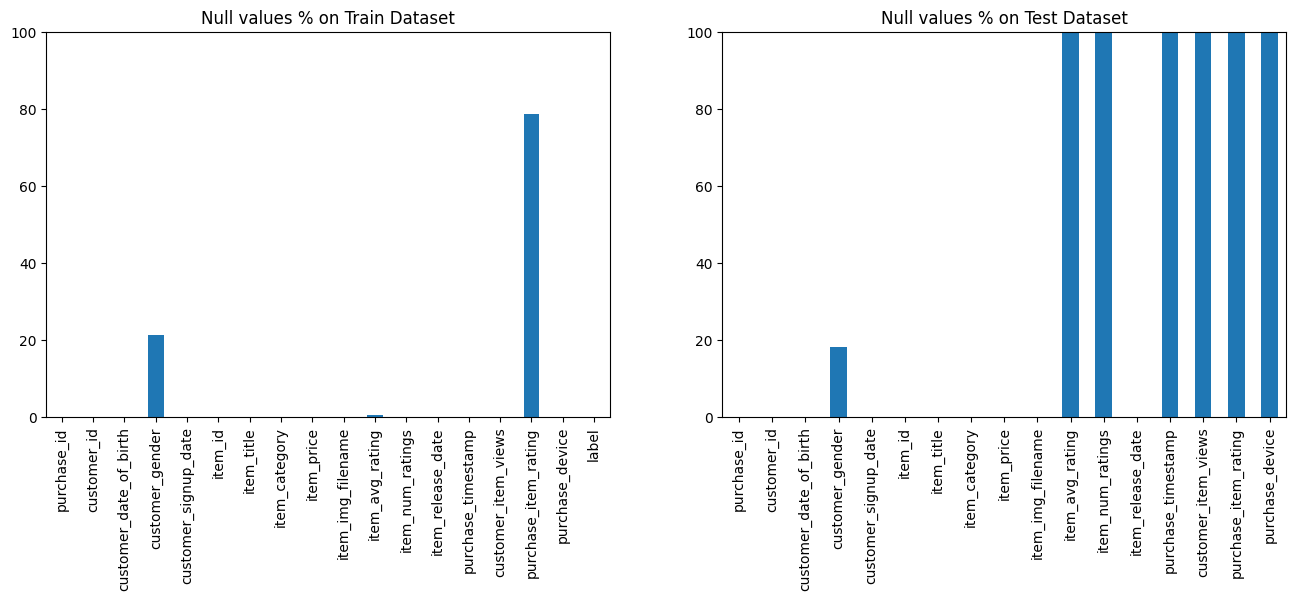

In [4]:
# Percentage of null values per column

train_null_pct = train_df.isnull().sum() / len(train_df) * 100
test_null_pct = test_df.isnull().sum() / len(test_df) * 100

fig, axes = plt.subplots(1, 2, figsize=(8*2, 5))

train_null_pct.plot(
    kind='bar',
    ax=axes[0],
    ylim=(0, 100),
    title="Null values % on Train Dataset"
)

test_null_pct.plot(
    kind='bar',
    ax=axes[1],
    ylim=(0, 100),
    title="Null values % on Test Dataset"
)

plt.show()

Clientes únicos: 500


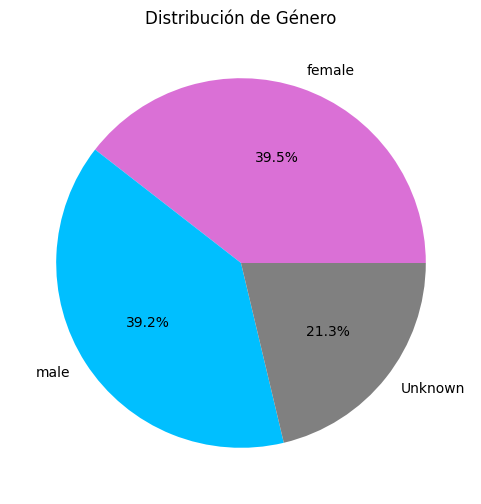

In [5]:
# Gender Distribution Pie Chart

df = train_df.copy()

# 1️ DATOS FALTANTES / LIMPIEZA
df['customer_gender'] = df['customer_gender'].fillna('Unknown')

# Número de clientes únicos
num_clientes = df['customer_id'].nunique()
print(f"Clientes únicos: {num_clientes}")

# Distribución de género
plt.figure(figsize=(6,6))
df['customer_gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orchid', 'deepskyblue','gray'])
plt.title("Distribución de Género")
plt.ylabel('')
plt.show()

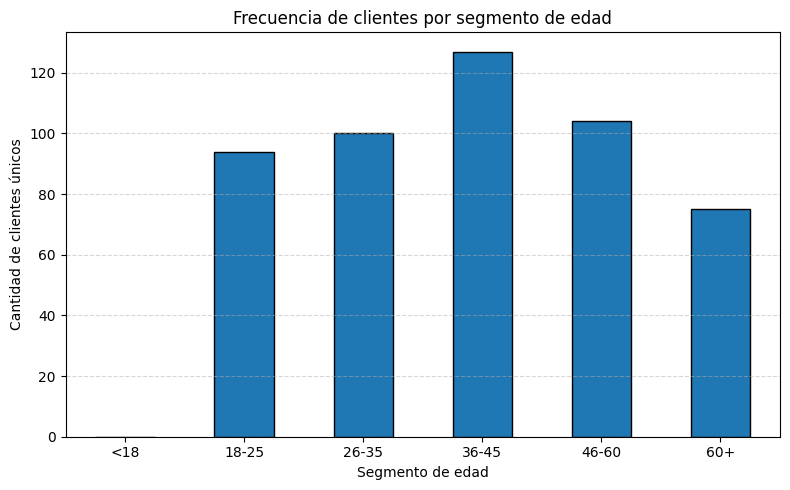

In [6]:
# Calcula la edad si no existe
if "edad" not in train_df.columns:
    today = pd.Timestamp("2025-09-21")
    train_df["customer_date_of_birth"] = pd.to_datetime(train_df["customer_date_of_birth"], errors="coerce")
    train_df["edad"] = (today - train_df["customer_date_of_birth"]).dt.days // 365

# Define los segmentos de edad
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-60", "60+"]

train_df["segmento_edad"] = pd.cut(train_df["edad"], bins=bins, labels=labels, right=False)

# Grafica la frecuencia de clientes por segmento de edad
plt.figure(figsize=(8,5))
train_df.drop_duplicates("customer_id")["segmento_edad"].value_counts(sort=False).plot(
    kind="bar", edgecolor="black"
)
plt.title("Frecuencia de clientes por segmento de edad")
plt.xlabel("Segmento de edad")
plt.ylabel("Cantidad de clientes únicos")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


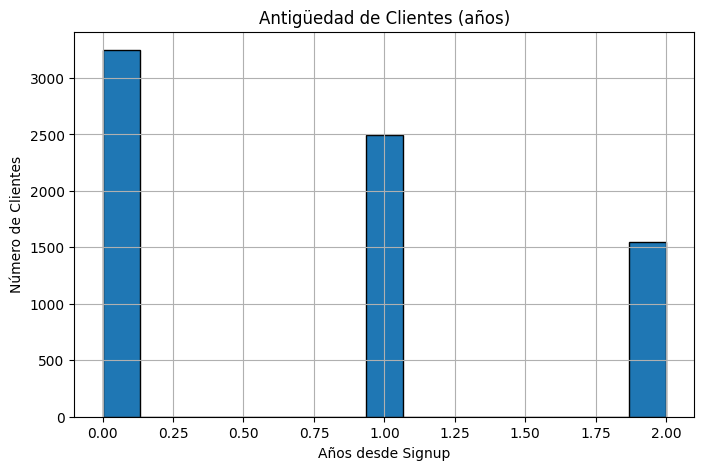

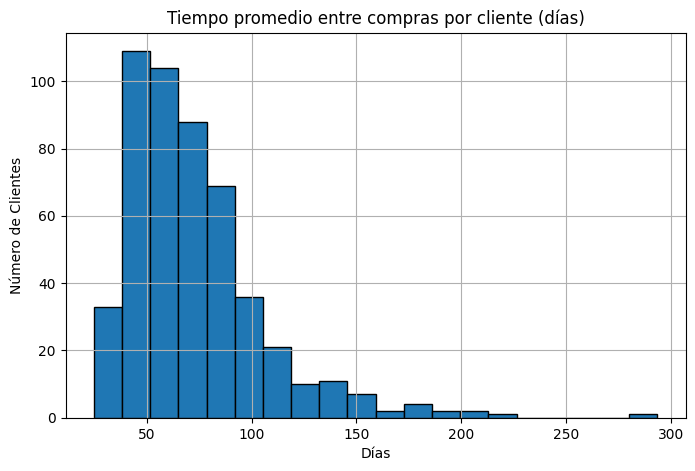

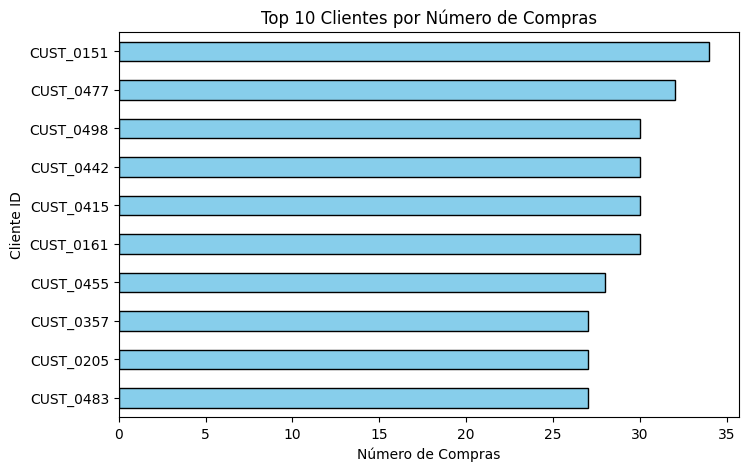

Número de categorías únicas: 10
Número de colores (imagenes): 8


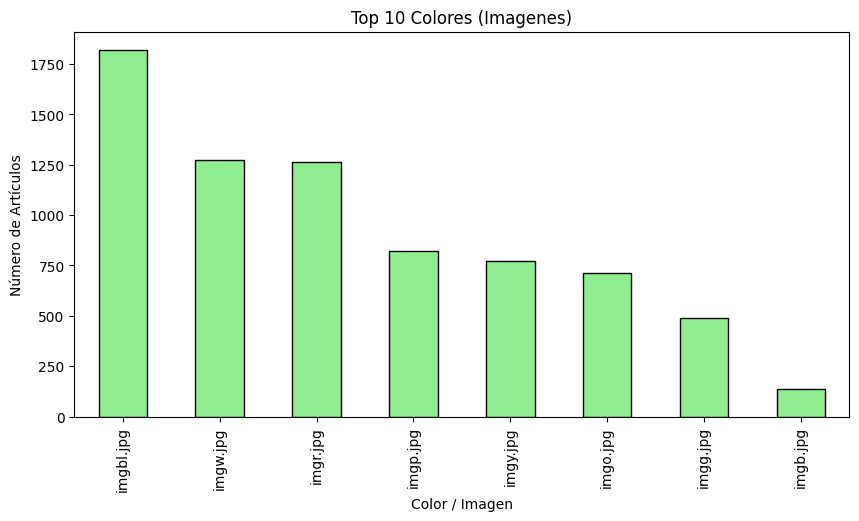

20 palabras más frecuentes en los títulos: [('shoes', 1504), ('casual', 1480), ('exclusive', 1423), ('stand', 1373), ('step', 1337), ('style', 1337), ('must', 1312), ('need', 1275), ('stylish', 1156), ('elegant', 1072), ('collection', 1048), ('jeans', 1029), ('every', 944), ('occasion', 944), ('premium', 943), ('blouse', 926), ('modern', 694), ('slacks', 676), ('dress', 670), ('jacket', 613)]
20 adjetivos más frecuentes: [('exclusive', 1423), ('casual', 1292), ('stylish', 868), ('elegant', 797), ('modern', 598), ('durable', 453), ('classic', 433), ('lightweight', 267), ('premium', 130), ('collection', 91), ('need', 79), ('step', 68), ('shirt', 46), ('dress', 26), ('occasion', 20), ('stand', 18), ('skirt', 17)]


C:\Users\joshi\AppData\Local\Temp\ipykernel_12496\1741284890.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['item_combined'] = df_top.apply(lambda x: f"{x['item_id']} | {x['item_title']}", axis=1)


<Figure size 1000x600 with 0 Axes>

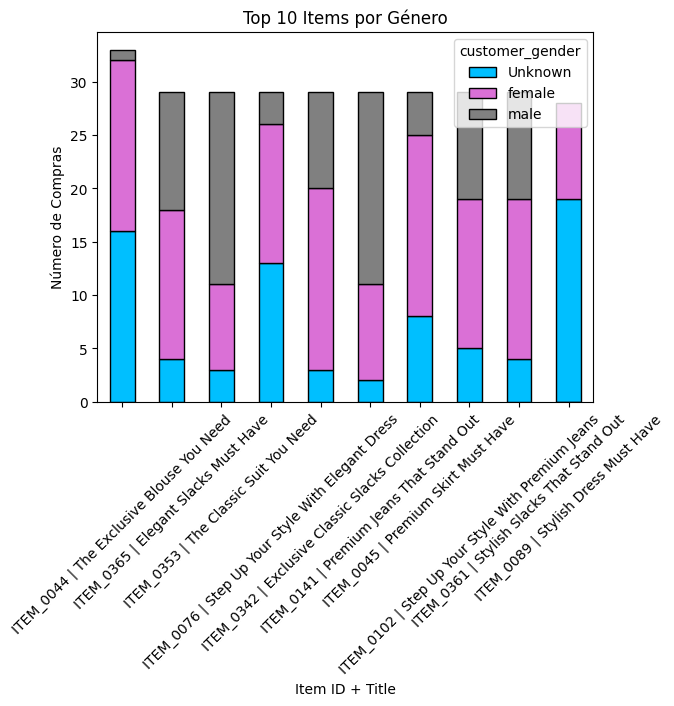

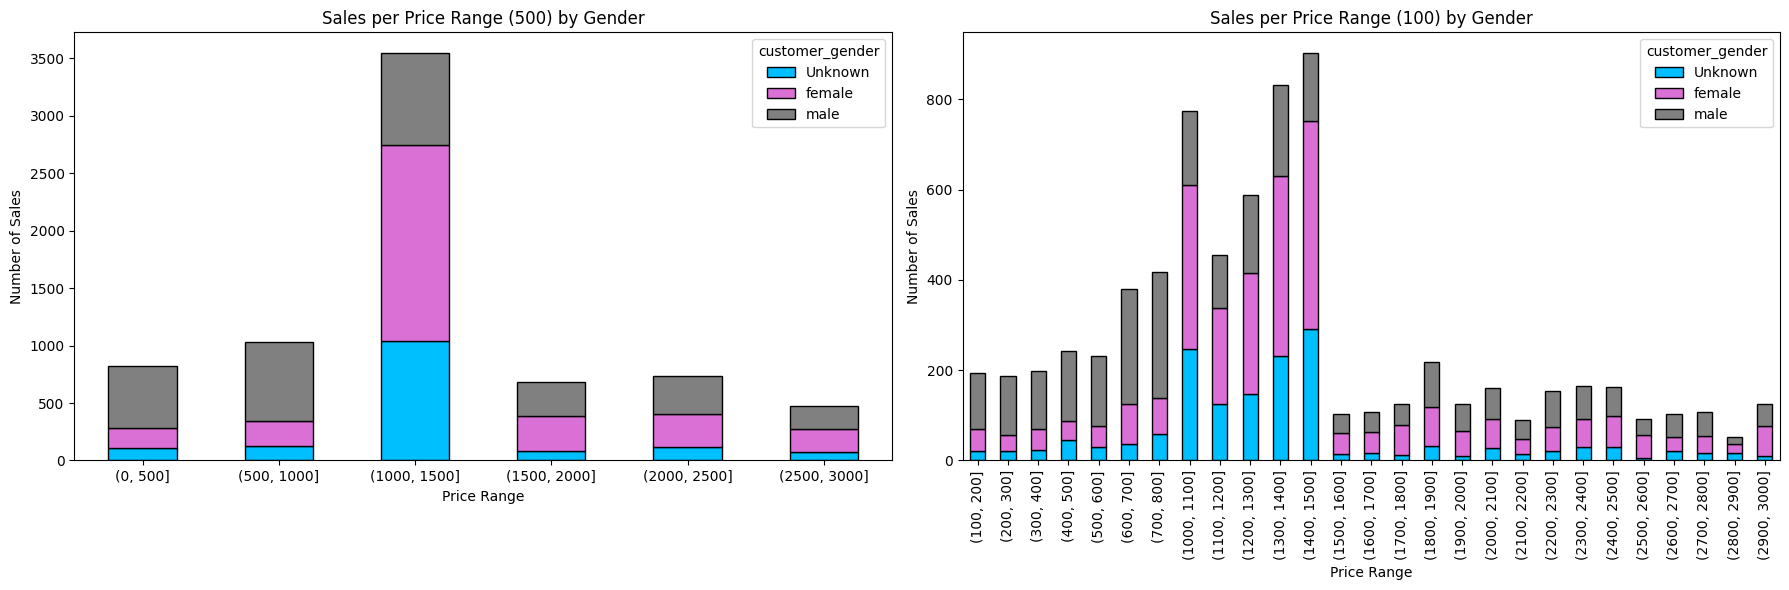

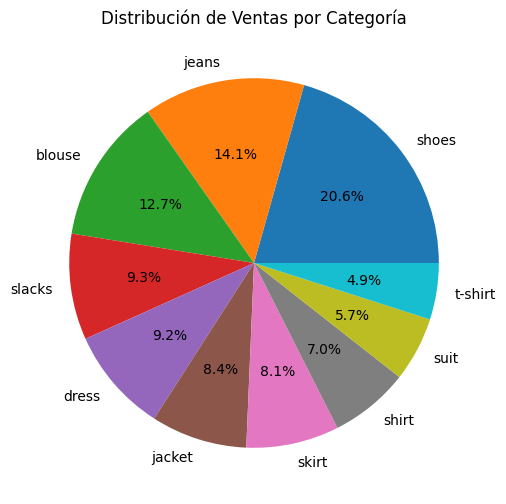

In [7]:
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')

# --- CONFIGURACIÓN GENERAL ---
#plt.style.use('classic')
today = pd.Timestamp("2025-09-21")

# -------------------------------
# 1️ DATOS FALTANTES / LIMPIEZA
# -------------------------------
df['customer_gender'] = df['customer_gender'].fillna('Unknown')
df['item_category'] = df['item_category'].fillna('Unknown')

# -------------------------------
# 2️ ANÁLISIS DE CLIENTES
# -------------------------------

# Antigüedad
df['customer_signup_date'] = pd.to_datetime(df['customer_signup_date'], errors='coerce')
df['antiguedad'] = (today - df['customer_signup_date']).dt.days // 365


# Antigüedad de clientes
plt.figure(figsize=(8,5))
df['antiguedad'].hist(bins=15, edgecolor='black')
plt.title("Antigüedad de Clientes (años)")
plt.xlabel("Años desde Signup")
plt.ylabel("Número de Clientes")
plt.show()

# Tiempo promedio entre compras por cliente
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'], errors='coerce')
df_sorted = df.sort_values(['customer_id', 'purchase_timestamp'])
diffs = df_sorted.groupby('customer_id')['purchase_timestamp'].diff().dt.days
avg_diffs = diffs.groupby(df_sorted['customer_id']).mean()
plt.figure(figsize=(8,5))
avg_diffs.hist(bins=20, edgecolor='black')
plt.title("Tiempo promedio entre compras por cliente (días)")
plt.xlabel("Días")
plt.ylabel("Número de Clientes")
plt.show()

# Top 10 clientes por número de compras
top_clients = df['customer_id'].value_counts().head(10)
plt.figure(figsize=(8,5))
top_clients.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Top 10 Clientes por Número de Compras")
plt.xlabel("Número de Compras")
plt.ylabel("Cliente ID")
plt.gca().invert_yaxis()
plt.show()

# -------------------------------
# 3️ ANÁLISIS DE ARTÍCULOS
# -------------------------------
# Número de categorías únicas
print("Número de categorías únicas:", df['item_category'].nunique())

# Número de colores (imagenes)
print("Número de colores (imagenes):", df['item_img_filename'].nunique())

# Artículos por color
plt.figure(figsize=(10,5))
df['item_img_filename'].value_counts().head(10).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Top 10 Colores (Imagenes)")
plt.xlabel("Color / Imagen")
plt.ylabel("Número de Artículos")
plt.show()

# Palabras en titles
all_words = [word.lower() for title in df['item_title'] for word in nltk.word_tokenize(str(title))]
stop_words = set(stopwords.words('english'))
words_clean = [w for w in all_words if w.isalpha() and w not in stop_words]
word_counts = Counter(words_clean)
most_common_words = word_counts.most_common(20)
print("20 palabras más frecuentes en los títulos:", most_common_words)

# Adjetivos en titles
pos_tags = nltk.pos_tag(words_clean)
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]
adj_counts = Counter(adjectives).most_common(20)
print("20 adjetivos más frecuentes:", adj_counts)

# Top 10 items (manteniendo IDs y títulos)
top_items = df.groupby(['item_id','item_title','item_img_filename'])['purchase_id'].count().sort_values(ascending=False).head(10)
top_index = top_items.index

# Crosstab por género para top 10
df_top = df[df.set_index(['item_id','item_title','item_img_filename']).index.isin(top_index)]
df_top['item_combined'] = df_top.apply(lambda x: f"{x['item_id']} | {x['item_title']}", axis=1)
crosstab = pd.crosstab(df_top['item_combined'], df_top['customer_gender'])
# Reindex para mantener el top 10 real
crosstab = crosstab.reindex([f"{i} | {t}" for i, t, _ in top_index], fill_value=0)

plt.figure(figsize=(10,6))
crosstab.plot(kind='bar', stacked=True, color=['deepskyblue','orchid','gray'], edgecolor='black')
plt.title("Top 10 Items por Género")
plt.xlabel("Item ID + Title")
plt.ylabel("Número de Compras")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 4️ VENTAS POR PRECIO
# -------------------------------
# Rango de 500 y 100
fig, axes = plt.subplots(1,2, figsize=(18,6))

for i, bin_width in enumerate([500,100]):
    bins = range(0, int(df['item_price'].max()) + bin_width, bin_width)
    df[f'price_range_{bin_width}'] = pd.cut(df['item_price'], bins=bins)
    crosstab_price = pd.crosstab(df[f'price_range_{bin_width}'], df['customer_gender'])
    crosstab_price.plot(kind='bar', stacked=True, color=['deepskyblue','orchid','gray'], ax=axes[i], edgecolor='black')
    axes[i].set_title(f"Sales per Price Range ({bin_width}) by Gender")
    axes[i].set_xlabel("Price Range")
    axes[i].set_ylabel("Number of Sales")
    axes[i].tick_params(axis='x', rotation=0 if bin_width==500 else 90)

plt.tight_layout()
plt.show()

# -------------------------------
# 5️ VENTAS POR CATEGORÍA
# -------------------------------
plt.figure(figsize=(6,6))
df['item_category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribución de Ventas por Categoría")
plt.ylabel('')
plt.show()

# -------------------------------
# 6️ VENTAS EN EL TIEMPO
# -------------------------------


---

### Ventas Por Categoria

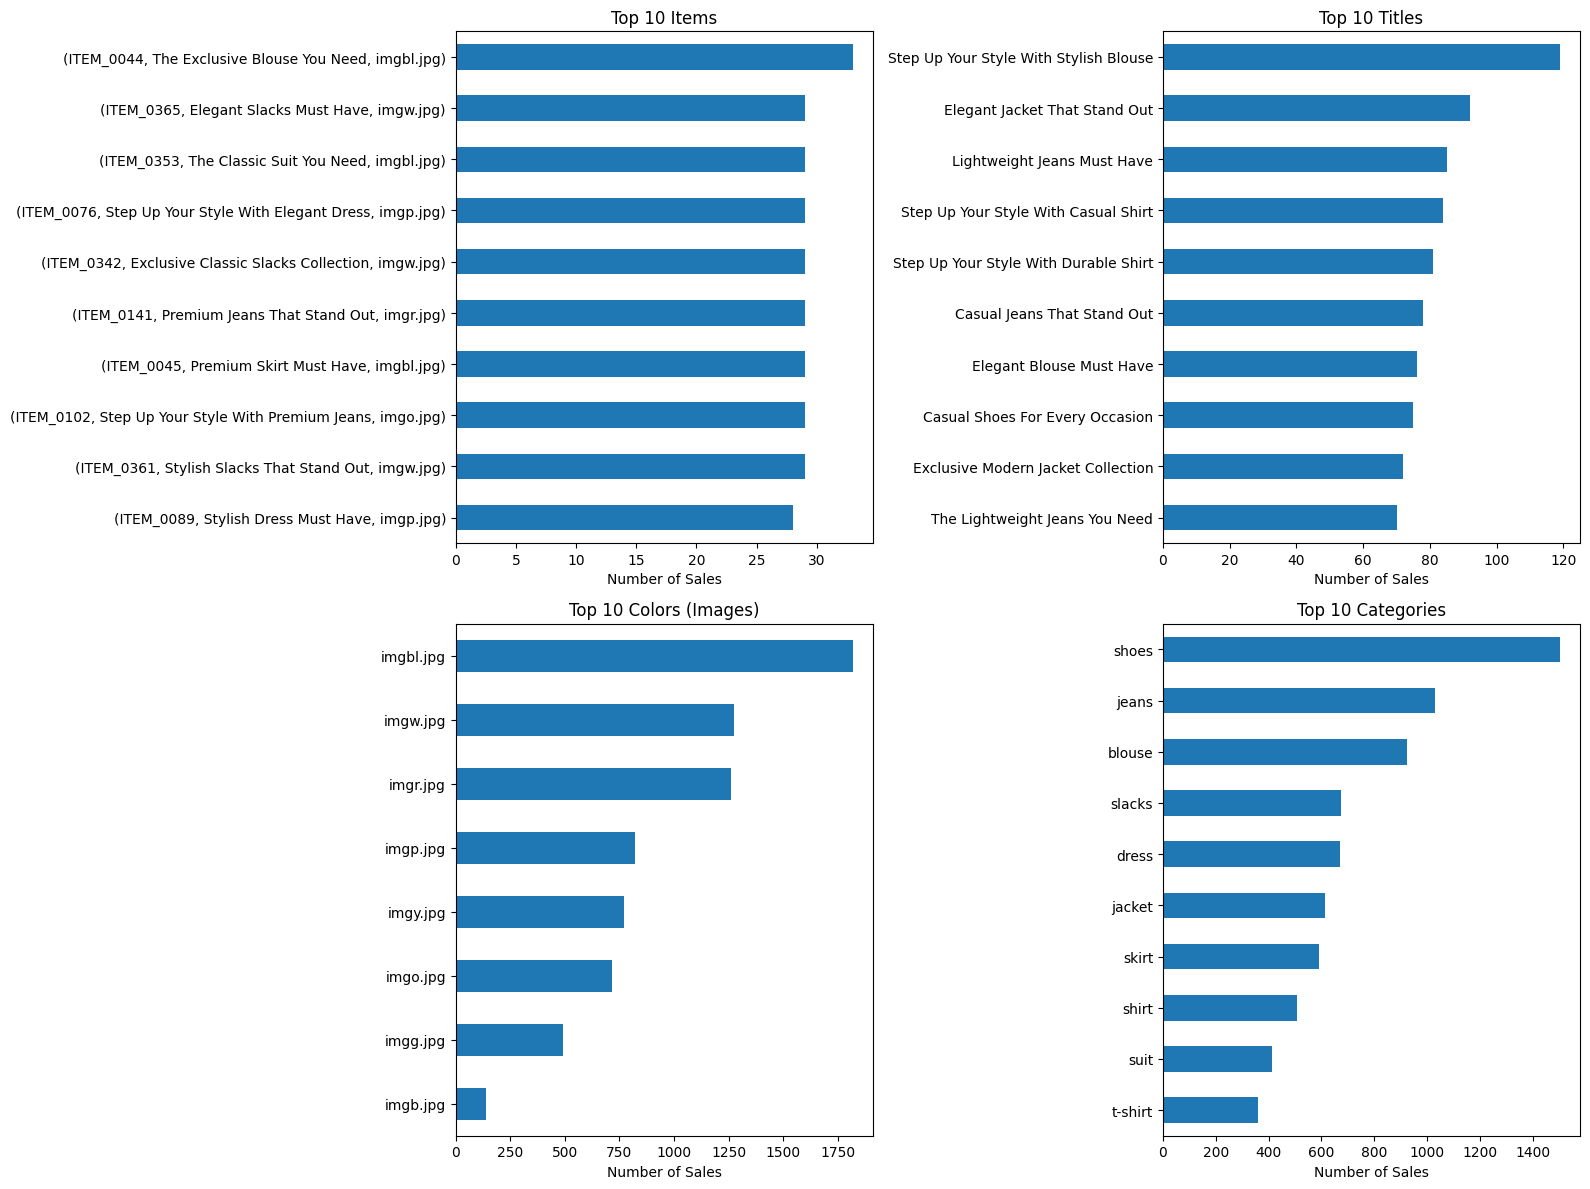

In [8]:
# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# Top-10 datasets
top_10_dict = {
    "Items": (train_df.groupby(["item_id", "item_title", "item_img_filename"])["purchase_id"].count().sort_values(ascending=False).head(10), "Item ID + Title"),
    "Titles": (train_df["item_title"].value_counts().head(10), "Title"),
    "Colors (Images)": (train_df["item_img_filename"].value_counts().head(10), "Image Filename"),
    "Categories": (train_df["item_category"].value_counts().head(10), "Category")
}

# Flatten axes array for easy iteration
axes_flat = axes.flatten()

for ax, (title, (data, ylabel)) in zip(axes_flat, top_10_dict.items()):
    data.plot(kind="barh", ax=ax)
    ax.set_title(f"Top 10 {title}")
    ax.set_xlabel("Number of Sales")
    ax.set_ylabel("")
    ax.invert_yaxis()  # highest at the top

plt.tight_layout()
plt.show()


---
### Ventas en el tiempo
Notar que existen compras realizadas después del 25 de septiembre del 2025

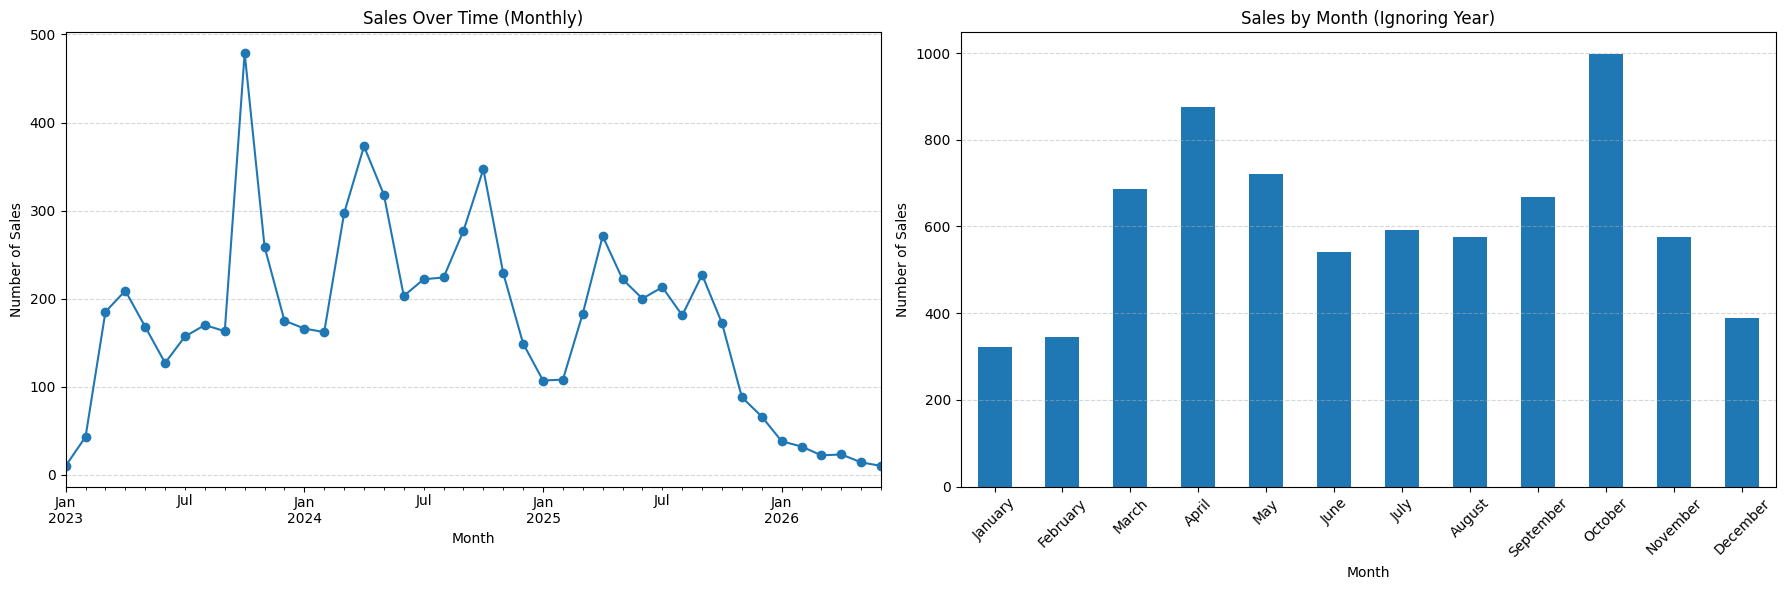

In [9]:
import calendar

# Ensure the timestamp column is datetime
train_df["purchase_timestamp"] = pd.to_datetime(train_df["purchase_timestamp"], errors="coerce")

# --- Sales over time (monthly, including year) ---
sales_over_time = train_df.groupby(train_df["purchase_timestamp"].dt.to_period("M"))["label"].count()

# --- Sales by month (ignoring year) ---
sales_by_month = train_df.groupby(train_df["purchase_timestamp"].dt.month)["label"].count()
sales_by_month.index = [calendar.month_name[m] for m in sales_by_month.index]  # Optional: use month names

# --- Side-by-side plots ---


fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Sales over time
sales_over_time.plot(kind="line", marker="o", ax=axes[0])
axes[0].set_title("Sales Over Time (Monthly)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Number of Sales")
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# Sales by month (ignoring year)
sales_by_month.plot(kind="bar", ax=axes[1])
axes[1].set_title("Sales by Month (Ignoring Year)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Number of Sales")
axes[1].grid(axis="y", linestyle="--", alpha=0.5)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---

## Customers

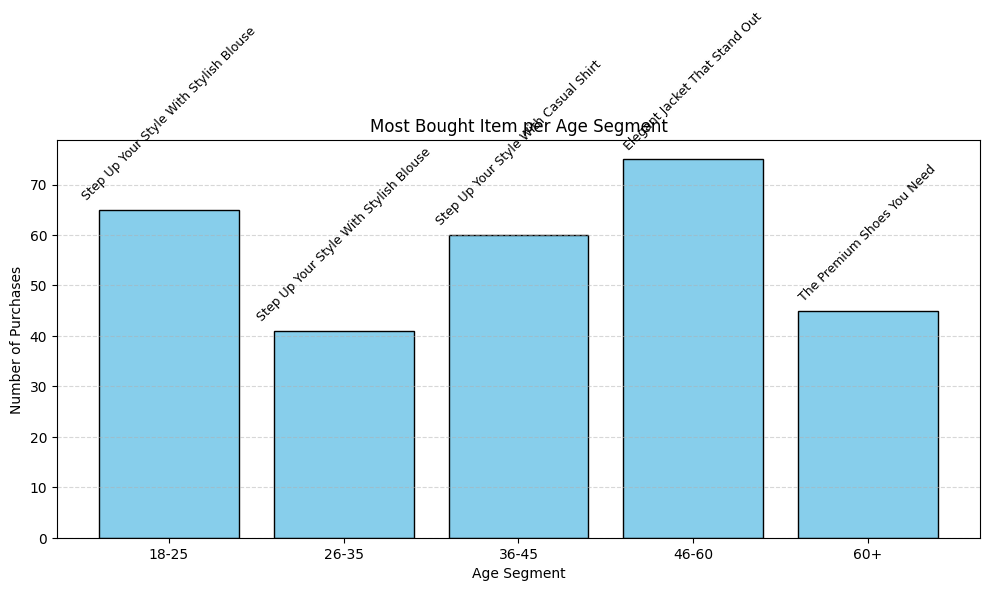

In [10]:
# Most bought article per age segment
most_bought_per_segment = (
    train_df.groupby(["segmento_edad", "item_title"], observed=True)["purchase_id"]
    .count()
    .reset_index()
)

# For each segment, get the item with the max purchases
most_bought_per_segment = most_bought_per_segment.loc[
    most_bought_per_segment.groupby("segmento_edad", observed=True)["purchase_id"].idxmax()
].sort_values("segmento_edad")

#print(most_bought_per_segment)

plt.figure(figsize=(10,6))
plt.bar(most_bought_per_segment["segmento_edad"],
        most_bought_per_segment["purchase_id"], 
        edgecolor="black", color="skyblue")

# Add item names as labels on top
for i, row in most_bought_per_segment.iterrows():
    plt.text(row["segmento_edad"], row["purchase_id"]+2, row["item_title"], 
             ha="center", rotation=45, fontsize=9)

plt.title("Most Bought Item per Age Segment")
plt.xlabel("Age Segment")
plt.ylabel("Number of Purchases")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



---

## Univariate Analysis

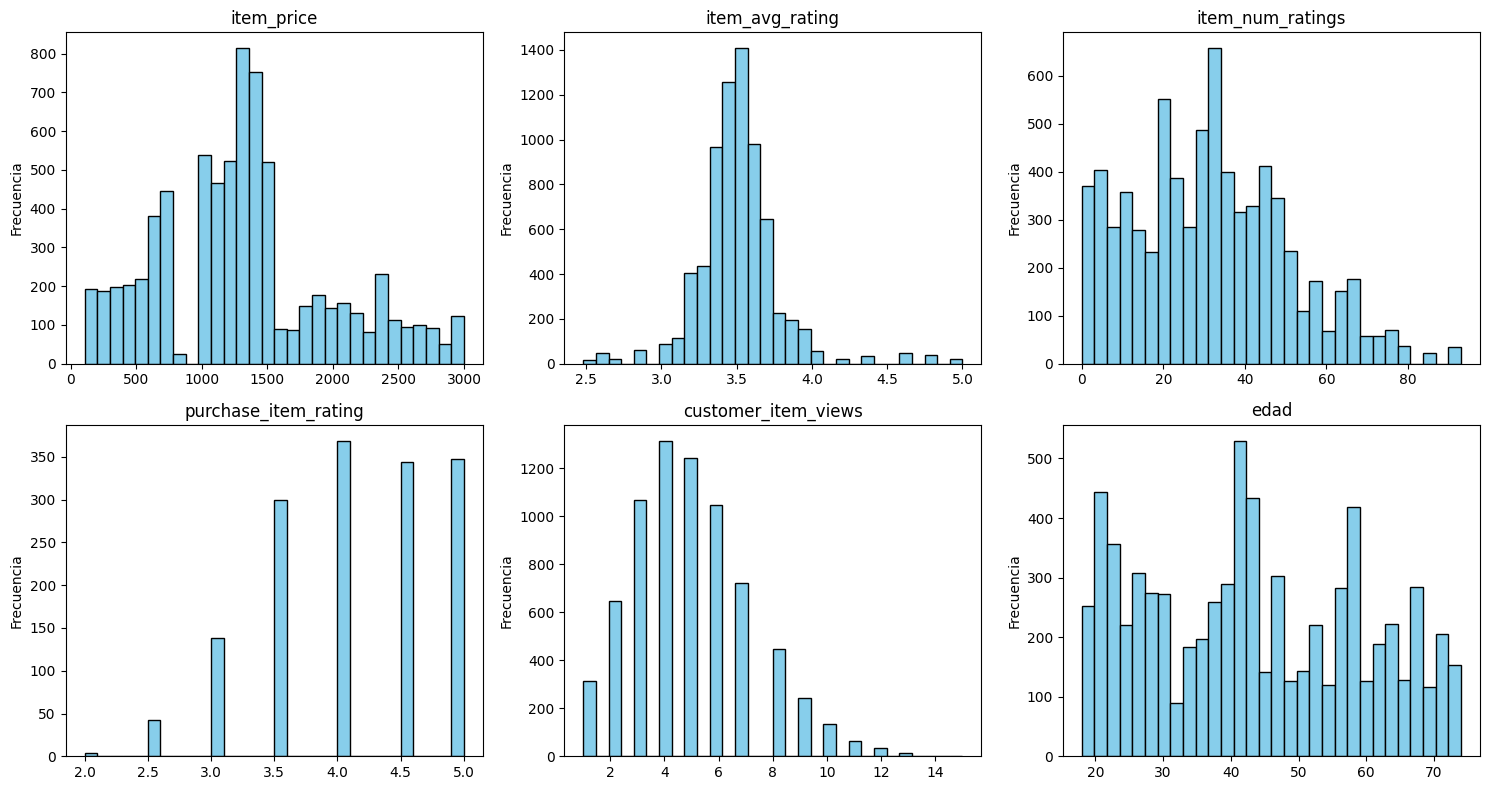

In [11]:
import matplotlib.pyplot as plt

# Selecciona las columnas numéricas/categóricas que quieres graficar
cols = [    
    "item_price", "item_avg_rating", "item_num_ratings", "purchase_item_rating", 
    "customer_item_views", "edad"
]

# Calcula la edad si no existe
if "edad" not in train_df.columns:
    today = pd.Timestamp("2025-09-21")
    train_df["customer_date_of_birth"] = pd.to_datetime(train_df["customer_date_of_birth"], errors="coerce")
    train_df["edad"] = (today - train_df["customer_date_of_birth"]).dt.days // 365

# Número de columnas y filas para la cuadrícula
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))

for i, col in enumerate(cols):
    ax = axes[i // n_cols, i % n_cols]
    train_df[col].dropna().plot(kind="hist", bins=30, ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("Frecuencia")

# Elimina ejes vacíos si hay (Recorre los subplots que no se usaron. Los elimina para que no aparezcan cuadros vacíos en la figura final.)
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.show()

In [12]:
# ver las palabras que hay en title, los adjetivos. hacer un listado de palabra tipo bag of words y ver frecuencia

# todo lo de genero, no se contó los que no son parte de ninguno. categoria unknown

# ver la antiguedad de los clientes segun el signup date y graficar frecuencia de antiguedad (años)


# numero de categorias unicas de items (10)

# numero de clientes unicos

# numero de colores (imagenes)
    # ver cuantos articulos por color hay

# ver cuantos hombres, mujeres y unknown (pie)

# igual con las categoria ver cuanto domina cada una respecto al 100% de registros (pie?)

# cada cuanto compran los clientes, que tan separadas estan sus compras
    # que tan separadas estan sus compras en promedio, por cliente


# lo que ya hay:
#   graficar porcentaje registros nulos por columna
#   sales per price range (con generos, pero falta agregar que cuente los que no tienen registrado su genero)
#   top 10 categorias vendidas para: item, title, categoria, color
#   sales over time and sales grouped by month (no year)
#   frecuencia de clientes por segmento de edad
#   articulo mas comprado por segmento de edad
#   top 10 clientes por numero de compras
#   

In [13]:
# Tokenize titles and tag parts of speech
df['title_tokens'] = df['item_title'].apply(nltk.word_tokenize)
df['title_pos'] = df['title_tokens'].apply(nltk.pos_tag)

# Extract adjectives from titles
df['adjectives'] = df['title_pos'].apply(lambda tokens: [word for word, pos in tokens if pos.startswith('JJ')])

# Explode the list of adjectives so each row is one adjective
df_adjectives = df.explode('adjectives')

# Aggregate total sales per adjective
adjective_sales = df_adjectives.groupby('adjectives')['purchase_id'].count().sort_values(ascending=False)

# Show top 20 adjectives driving sales
print(adjective_sales.head(20))

# Suppose 'customer_gender' and 'segmento_edad' exist
adjective_gender_sales = df_adjectives.pivot_table(
    index='adjectives',
    columns='customer_gender',
    values='purchase_id',
    aggfunc='count',
    fill_value=0
)

# Optional: sort by total sales
adjective_gender_sales['Total'] = adjective_gender_sales.sum(axis=1)
adjective_gender_sales = adjective_gender_sales.sort_values('Total', ascending=False)

adjective_gender_sales.head(20)


adjectives
Exclusive      1250
Style          1093
Casual          969
Stylish         924
Elegant         691
Durable         441
Classic         317
Lightweight     236
Modern          139
Premium         129
Name: purchase_id, dtype: int64


customer_gender,Unknown,female,male,Total
adjectives,,,,
Exclusive,297,548,405,1250
Style,217,405,471,1093
Casual,136,298,535,969
Stylish,268,416,240,924
Elegant,152,315,224,691
Durable,51,87,303,441
Classic,44,148,125,317
Lightweight,25,43,168,236
Modern,35,63,41,139


parece que el publico masculino tiene fuerte tendencia a comprar aquello "durable" y "lightweight"

femenino fuerte tendencia a comprar stylish, elegant

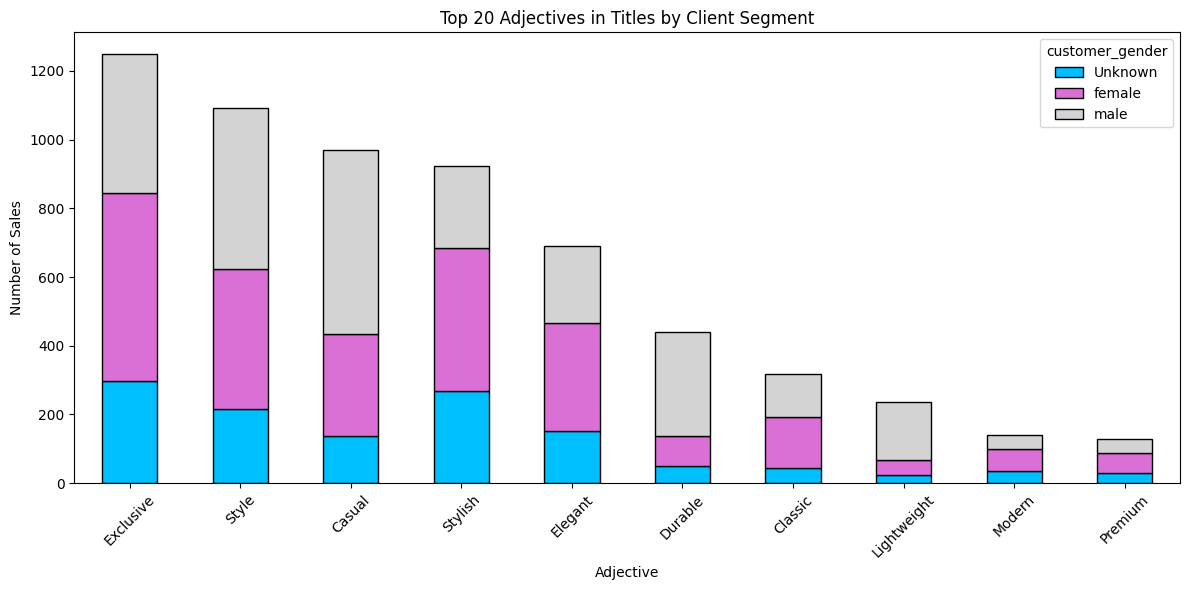

In [ ]:
# # Keep top 20 adjectives by total sales
# top_adjs = adjective_gender_sales.sort_values('Total', ascending=False).head(20)

# # Plot stacked bar by segment
# top_adjs.drop(columns='Total').plot(
#     kind='bar', 
#     stacked=True, 
#     figsize=(12,6),
#     color=['deepskyblue', 'orchid', 'lightgrey'],  # adjust based on segments
#     edgecolor='black'
# )

# plt.title("Top 20 Adjectives in Titles by Client Segment")
# plt.xlabel("Adjective")
# plt.ylabel("Number of Sales")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


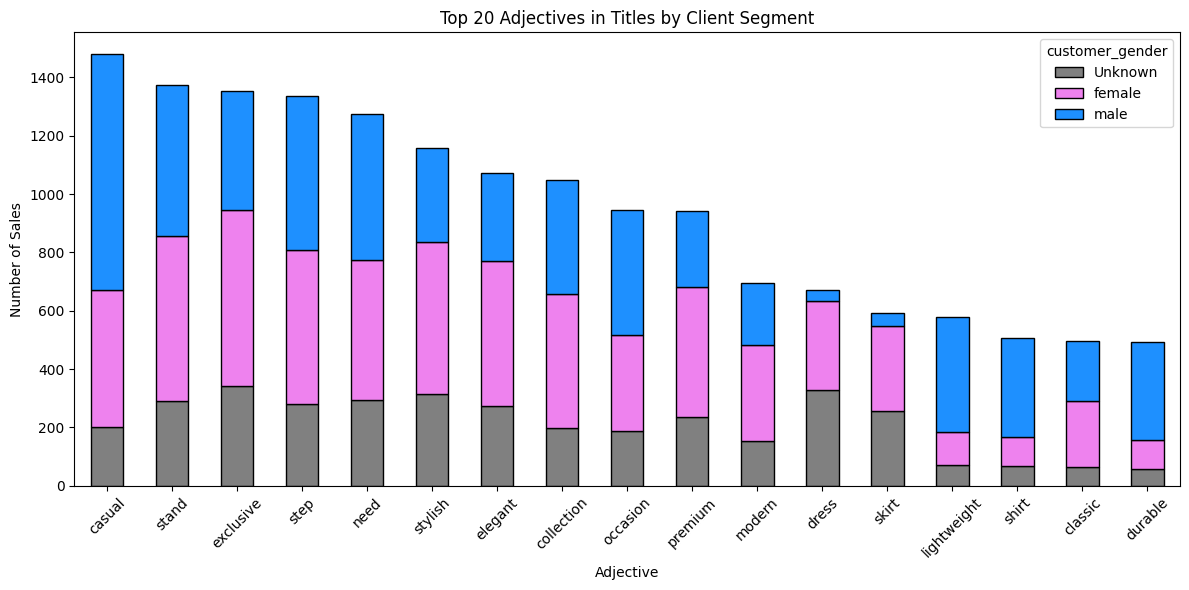

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')

# --- Extract words & adjectives from item titles ---
df = train_df.copy()
df['title_words'] = df['item_title'].str.lower().str.split()

# Flatten all words
all_words = [word for sublist in df['title_words'] for word in sublist]

# Optionally remove stopwords, punctuation etc.
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
words_clean = [w for w in all_words if w.isalpha() and w not in stop_words]

# POS tagging
pos_tags = nltk.pos_tag(words_clean)
adjectives = [word for word, pos in pos_tags if pos.startswith('JJ')]

# Count adjectives in titles
adj_counts = Counter(adjectives)
top_adjs = [word for word, count in adj_counts.most_common(50)]  # adjust number

# --- Create row per sale with adjectives present ---
rows = []
for _, row in df.iterrows():
    words = set(row['title_words'])
    relevant_adjs = words.intersection(top_adjs)
    for adj in relevant_adjs:
        gender = row['customer_gender'] if pd.notna(row['customer_gender']) else 'Unknown'
        rows.append({'adjective': adj, 'customer_gender': gender})

adj_df = pd.DataFrame(rows)

# --- Pivot table to get sales per adjective per gender, including Unknown ---
adjective_gender_sales = pd.pivot_table(
    adj_df,
    index='adjective',
    columns='customer_gender',
    aggfunc='size',
    fill_value=0
)

# Add total column
adjective_gender_sales['Total'] = adjective_gender_sales.sum(axis=1)

# --- Plot top 20 adjectives by total sales ---
top20 = adjective_gender_sales.sort_values('Total', ascending=False).head(20)

gender_colors = {
    'Unknown': 'grey',
    'male': 'dodgerblue',
    'female': 'violet'
}

colors = [gender_colors[col] for col in top20.drop(columns='Total').columns]

top20.drop(columns='Total').plot(
    kind='bar', 
    stacked=True,
    figsize=(12,6),
    edgecolor='black',
    color=colors
)
plt.title("Top 20 Adjectives in Titles by Client Segment")
plt.xlabel("Adjective")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
# Procesamiento y Transformación de Datos 

In [ ]:
# --- Crear copia para codificación ---
df_encoded = train_df.copy()

# --- Rellenar valores nulos y estandarizar ---
df_encoded['customer_gender'] = df_encoded['customer_gender'].fillna('Unknown')

# --- Crear columnas one-hot ---
gender_dummies = pd.get_dummies(df_encoded['customer_gender'], prefix='gender')

# --- Concatenar al dataframe ---
df_encoded = pd.concat([df_encoded, gender_dummies], axis=1)

# --- Mostrar solo las columnas de interés ---
cols_to_show = ['customer_gender'] + list(gender_dummies.columns)
pd.set_option('display.max_columns', None)
print(df_encoded[cols_to_show].head())


In [ ]:
# --- Rellenar posibles valores nulos en categoría ---
df_encoded['item_category'] = df_encoded['item_category'].fillna('Unknown')

# --- Crear columnas one-hot para categoría ---
category_dummies = pd.get_dummies(df_encoded['item_category'], prefix='category')

# --- Concatenar al dataframe ---
df_encoded = pd.concat([df_encoded, category_dummies], axis=1)

# --- Mostrar columnas de género y categoría ---
cols_to_show = ['customer_gender'] + list(gender_dummies.columns) + ['item_category'] + list(category_dummies.columns)
pd.set_option('display.max_columns', None)
print(df_encoded[cols_to_show].head())


## Columnas a considerar para el modelo

### Perfil del cliente
- Porcentaje de sus compras que son a cada de las categorías
- Porcentajde sus compras que son a cada de los colores
- Porcentaje de sus compras que son a cada adjetivo
- Promedio del costo de sus compras
- Varianza del promedio de sus compras
- one hot para el genero

### Perfil del producto
- Su adjetivo predominante
- Precio
- Color
- categoría
- (idk) mes en el que salió